<a href="https://colab.research.google.com/github/cam2149/MachinelearningI/blob/main/Aprendizaje_autom%C3%A1tica_I_20240930.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Regresion Simple

Modelo teorico: $y=\beta_0+\beta_1 x+\epsilon$

Recta de regresión:
$\hat{y}=\hat{\beta_0}+\hat{\beta_1}x$

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

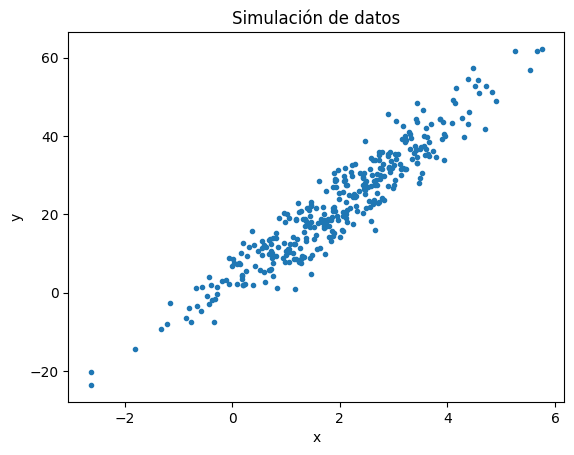

In [ ]:
################## Simulando datos que cumplan un modelo lineal ################
beta0 = 2.6  ### Intercepto teorico del modelo
beta1 = 10  ### Pendiente teórica del modelo
n = 344      ### tamaño de muestra para la simulación

x = np.random.normal(size = n, loc = 2, scale = 1.3)  ### Simulando nuestro conjunto de entrada o variable explicativa

### Los errores son independientes, identicamente distribuidos de una normal con media cero y varianza cosntante.
e = np.random.normal(size = n, loc = 0, scale = 5)

y = beta0 + beta1*x + e  ### Simulando nuestro conjunto de salida o variable dependiente

###################### Grafiquemos nuestra simulación ##########################
plt.plot(x, y, '.')
plt.title('Simulación de datos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
##### Estimando los coeficientes del modelo #######
b1 = np.sum((x-np.mean(x))*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)
b0 = np.mean(y)-b1*np.mean(x)
print('b0 = ', round(b0, 3))
print('b1 = ', round(b1, 3))

b0 =  2.938
b1 =  9.919


In [ ]:
beta1 = np.cov(x, y)[0, 1]/np.var(x, ddof = 1)
beta0 = np.mean(y)-beta1*np.mean(x)
print(f"beta0: {round(beta0, 3)}, beta1: {round(beta1, 3)}")

beta0: 2.938, beta1: 9.919


Recta de regresión estimada: $\hat{y}=2.938+9.919*x$

Interpretación: La variable x tiene un impacto positivo en la variable respuesta de magnitud 9.919, en otras palabras, por cada aumento en una unidad de la variable x en promedio la variable y va a aumentar 9.919 unidades.

Text(0, 0.5, 'y')

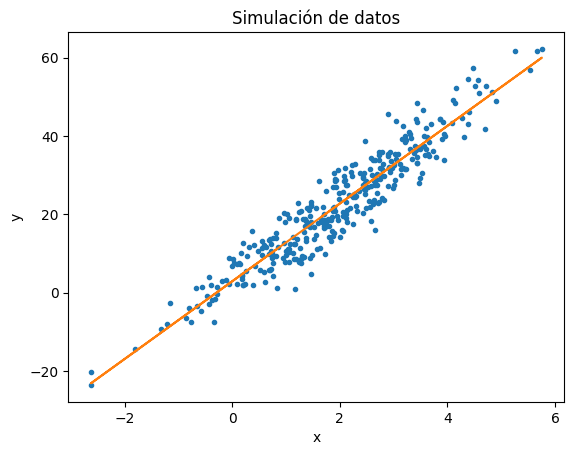

In [ ]:
### Predicción del modelo
y_hat = beta0 + beta1 * x

plt.plot(x, y, '.')
plt.title('Simulación de datos')
plt.plot(x, y_hat)
plt.xlabel('x')
plt.ylabel('y')

(array([  1.,   6.,  25.,  79., 177., 260., 242., 146.,  55.,   9.]),
 array([-19.91917491, -16.49343864, -13.06770236,  -9.64196609,
         -6.21622981,  -2.79049353,   0.63524274,   4.06097902,
          7.48671529,  10.91245157,  14.33818785]),
 <BarContainer object of 10 artists>)

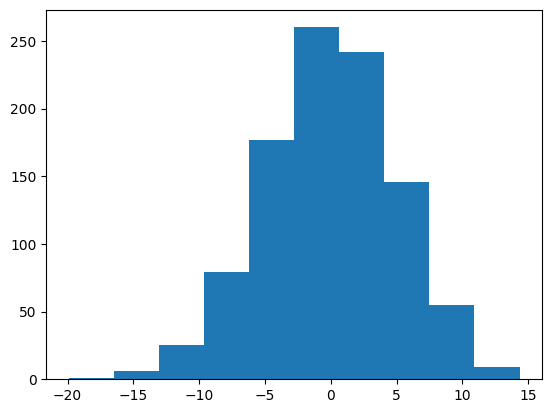

In [ ]:
plt.hist(e)

In [ ]:
! pip install palmerpenguins

In [ ]:
from palmerpenguins import load_penguins

df = load_penguins()
df.head(50)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


array([[<Axes: xlabel='bill_length_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='body_mass_g', ylabel='bill_length_mm'>,
        <Axes: xlabel='year', ylabel='bill_length_mm'>],
       [<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='body_mass_g', ylabel='bill_depth_mm'>,
        <Axes: xlabel='year', ylabel='bill_depth_mm'>],
       [<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='flipper_length_mm'>,
        <Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>,
        <Axes: xlabel='year', ylabel='flipper_length_mm'>],
       [<Axes: xlabel='bill_le

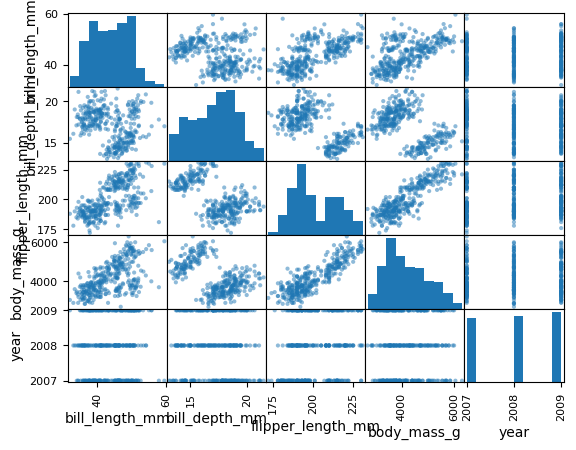

In [ ]:
pd.plotting.scatter_matrix(df)

In [ ]:
df[["body_mass_g", "flipper_length_mm"]].head()

,body_mass_g,flipper_length_mm
0,3750.0,181.0
1,3800.0,186.0
2,3250.0,195.0
3,NaN,NaN
4,3450.0,193.0


In [ ]:
df1 = df[["body_mass_g", "flipper_length_mm"]].dropna()
df1.head()

,body_mass_g,flipper_length_mm
0,3750.0,181.0
1,3800.0,186.0
2,3250.0,195.0
4,3450.0,193.0
5,3650.0,190.0


Text(0, 0.5, 'body_mass_g')

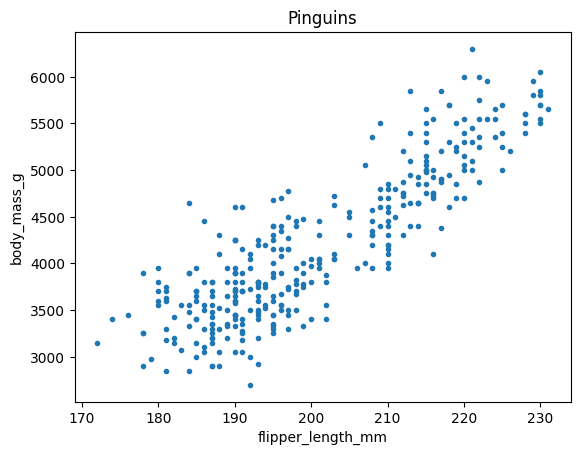

In [ ]:
### Definiendo mis variables 'x' y 'y'
x = df1["flipper_length_mm"].values
y = df1["body_mass_g"].values

plt.plot(x, y, ".")
plt.title("Pinguins")
plt.xlabel("flipper_length_mm")
plt.ylabel("body_mass_g")

beta0: -5780.831, beta1: 49.686


Text(0, 0.5, 'body_mass_g')

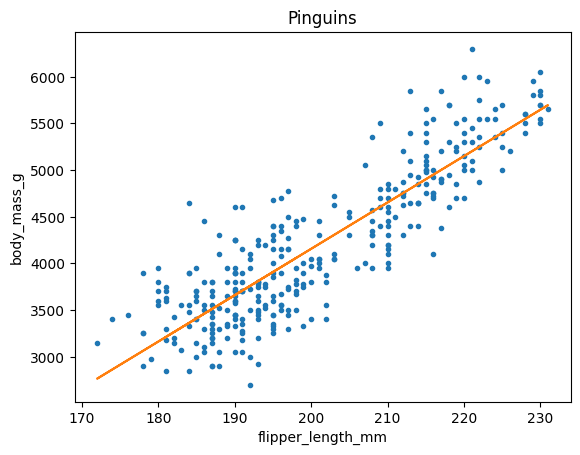

In [ ]:
### Calculemos nuestra recta de regresion
b1 = np.cov(x, y)[0, 1]/np.var(x, ddof = 1)
b0 = np.mean(y)-b1*np.mean(x)
print(f"beta0: {round(b0, 3)}, beta1: {round(b1, 3)}")

### Estimamos nuestros y hat
y_hat = b0 + b1 * x

plt.plot(x, y, ".")
plt.plot(x, y_hat)
plt.title("Pinguins")
plt.xlabel("flipper_length_mm")
plt.ylabel("body_mass_g")

$Peso_{[g]} = -5780.831 + 49.686*Longitud_{aleta[mm]}$

(array([ 4., 17., 44., 71., 83., 60., 35., 18.,  8.,  2.]),
 array([-1058.79739189,  -824.04893877,  -589.30048564,  -354.55203252,
         -119.80357939,   114.94487373,   349.69332686,   584.44177998,
          819.1902331 ,  1053.93868623,  1288.68713935]),
 <BarContainer object of 10 artists>)

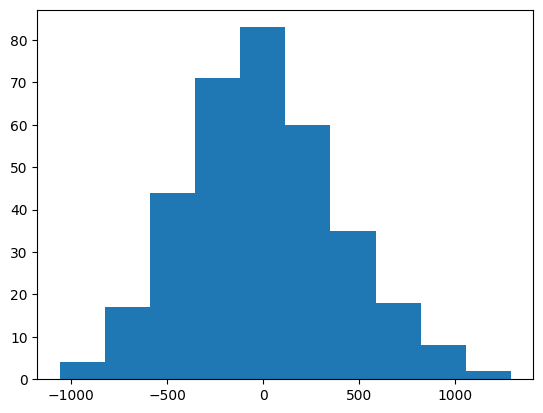

In [ ]:
### Calculando nuestros residuales
residuales = y - y_hat

# Supuestos del modelo lineal

1. Esperanza de los errores es cero --- One-sample-t-test

2. Normalidad en los errores --- Test Shapiro-Wilks, Kolmogorov-Smirnov, Anderson-Darling

3. Independendia en los errores --- Test de autocorrelación de Durbin-Watson (DW test).

4. Homocedasticidad en los errores (Varianza cte) --- Test Breusch-Pagan


Interpretación general de un test: Si el p-valor <= $\alpha$ se rechaza la hipotesis nula $H_0$, en caso contrario si p-valor > $\alpha$ NO se rechaza la hipotesis nula $H_0$. Por defecto el valor de $\alpha$ se toma en 0.05, y se conoce como nivel de significancia de la prueba.

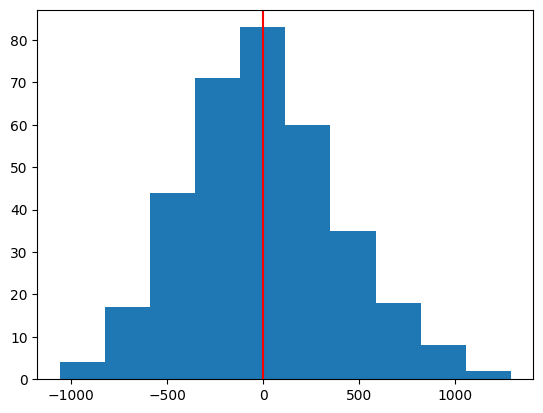

Media residuales: 6.435605784475106e-13
Resultados t-test: TtestResult(statistic=3.0229953346790616e-14, pvalue=0.9999999999999759, df=341)


In [ ]:
from scipy.stats import ttest_1samp, shapiro, kstest, anderson, probplot#, durbin_watson, bartlett
#### 1) Media cero en los errores

### Graficamente podemos mirar la distribución de los datos y graficar con una linea vertical la
### media muestral de los residuales
plt.hist(residuales)
plt.axvline(np.mean(residuales), color = 'red')
plt.show()

#### H0: E[e_i] = popmean vs H1: E[e_i] != popmean
#### Para el supuesto del modelo lineal popmean = 0
print(f"Media residuales: {np.mean(residuales)}")
print("Resultados t-test:", ttest_1samp(residuales, popmean = 0))  ## popmean se refiere al valor de la media que yo quiero testear

Con una nivel de significancia $\alpha = 0.05$, y un p-valor de $\approx 1$, como p-value > $\alpha$, no existe suficiente evidencia muestral para rechazar la hipotesis nula. Por lo tanto NO rechazo la hipotesis nula y puedo  suponer que los residuales están centrados en cero.

1) Media cero: CUMPLE

In [ ]:
print(np.round(ad[2], 3))
print(ad[1])

[15.  10.   5.   2.5  1. ]
[0.569 0.649 0.778 0.908 1.08 ]


Normalidad -> Shapiro-Wilks estaditico: 0.9930134706549096, p_value=0.1122749048698416
No Normalidad -> Kolmogorov-Smirnov estaditico: 0.5348771983514843, p_value=5.865928875722483e-92
Normalidad -> Anderson-Darling estaditico: 0.6817644911150182, p_value=0.778


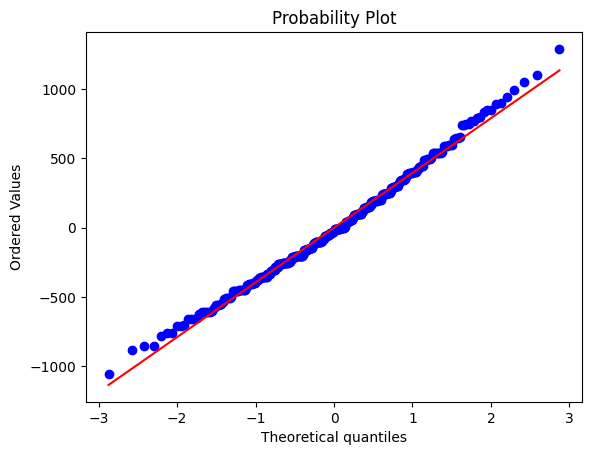

In [ ]:
################################### Test de Normalidad #########################
# 2) Normalidad
### H0: e_i~Normal vs H1: e_i !~ Normal
sw = shapiro(residuales)
print(f"Normalidad -> Shapiro-Wilks estaditico: {sw[0]}, p_value={sw[1]}")
## A un nivel De significancia del 0.05 como el p-value es mayor al alpha, NO existe evidencia suficiente para rechazar Normalidad.

### H0: e_i~Normal vs H1: e_i !~ Normal
ks = kstest(residuales, 'norm')
print(f"No Normalidad -> Kolmogorov-Smirnov estaditico: {ks[0]}, p_value={ks[1]}")
## A un nivel de significancia del 0.05 como el p-value es menor al alpha, SI existe evidencia suficiente para rechazar Normalidad.

### H0: e_i~Normal vs H1: e_i !~ Normal
ad = anderson(residuales, dist='norm')
print(f"Normalidad -> Anderson-Darling estaditico: {ad[0]}, valorCritico={ad[1][2]}")
## A un nivel de significancia del 0.05 como el estadistico de prueba no sobrepasa el valor crítico y cae en region de no Rechazo,
## no existe sufieciente evidencia muestral para rechazar la hipotesis nula

probplot(residuales, dist = "norm", plot = plt)
plt.show()

### 2) Normalidad: CUMPLE

Debido a que el teste de Shapiro Wilks y el de Anderson-Darlin no rechazaron Normlaidad mientras que por Kolmogorov-Smirnov si; por mayoria podemos suponer normalidad en los residuales.



## Interpretación del test Durbin-Watson

3) Independencia
Si el valor DW esta en el intervalo [1.5, 2.5], no existe sificiente evidencia muestral para rechaza la hipotesis nula -> H0, en otro caso existe evidencia muestral suficiente para rechazar la hipoteis nula -> H1.

2.1895606597572894


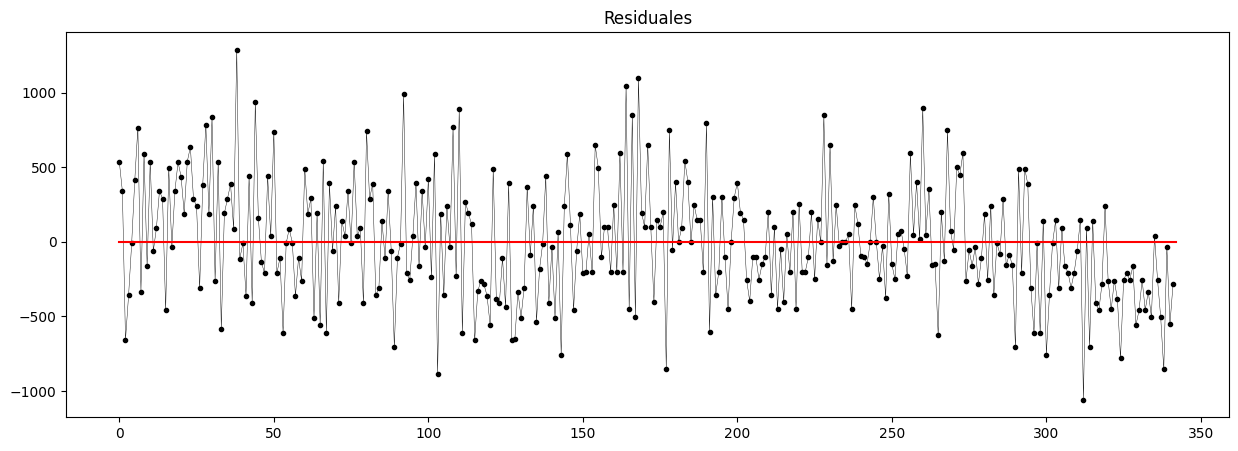

In [ ]:
######################## Test de Independencia (autocorrelación de Durbin-Watson) ######
from statsmodels.stats.stattools import durbin_watson

## 3) Independencia
## H0: Corr(e_i, e_i-1)=0 vs H1: corr(e_i, e_i-1) != 0
print(durbin_watson(residuales))

### Como el estadistico DW es menor a 2.5 y mayor a 1.5 NO existe suficiente evidencia muestral pra rechazar la hopotesis nula,
### por lo tanto puedo suponer independencia en los residuales.

plt.figure(figsize = (15, 5))
plt.plot(residuales, '.-', color = "black", linewidth = 0.3)
plt.plot([0, len(residuales)], [0, 0], color = "red")
plt.title('Residuales')
plt.show()

### Independencia: CUMPLE Analíticamente, Gráficamente hay dudas

In [ ]:
### 4) Homocedasticidad en los residuales

from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

## H0: Homocedasticidad vs H1: Heterocedasticidad
LM, PLM, f_test, p_value = het_breuschpagan(residuales, sm.add_constant(x), robust = False)
p_value

### Con un nivel de significancia del 0.05 como el p-valor asociadio al test BP es mayor a alpha,
### No existe suficiente evidencia muestral para rechazar la hipotesis nula, por lo tanto
### Suponemos homocedasticidad.
### Homocedasticidad: CUMPLE{}

0.14267023329591516

# 30-09-2024
## Modelo Lineal Multiple

Modelo lineal: $y_i = \beta_0 + \beta_1*X_1+⋯+\beta_p*x_p + e_i$

Recta de regresión $\hat{y}_i = \hat{\beta_0} + \hat{\beta_1}*X_1+⋯+\hat{\beta_p}*X_p$

1. Forma habitual de la solución matricial
$$\hat{\beta} = (X^\top X)^{-1}X^\top y$$

2. Forma alternativa de la solución matricial
$$\hat{\beta}^{[0]} = \hat{\Sigma}_{XX}^{-1}\hat{\Sigma}_{Xy}$$

$$\hat{\beta_0}=\bar{y}-\bar{X}^\top \hat{\beta}^{[0]}$$

In [ ]:
df1 = df.drop(["species", "island", "sex", "year"], axis = 1)
df1.dropna(inplace = True)
df1.reset_index(drop = True, inplace = True)
df1.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [ ]:
import numpy as np
### Extrayendo nuestro target
y = df1["body_mass_g"].values

### Extrayendo variables de entrada
X = df1.drop("body_mass_g", axis = 1).values

### Construir la matriz de diseño
X = np.column_stack((np.ones(X.shape[0]), X))
X

array([[  1. ,  39.1,  18.7, 181. ],
       [  1. ,  39.5,  17.4, 186. ],
       [  1. ,  40.3,  18. , 195. ],
       ...,
       [  1. ,  49.6,  18.2, 193. ],
       [  1. ,  50.8,  19. , 210. ],
       [  1. ,  50.2,  18.7, 198. ]])

In [ ]:
### Estimando los betas por la formula matricial convencional

beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

array([-6.42476470e+03,  4.16182047e+00,  2.00495331e+01,  5.02692216e+01])

Recta de regresión resultante:

$$\hat{y} = -6424.7646 + 4.1618*X1 +20.0495*X2 +50.2692*X3$$

### Tres formas acternativas para hacer el mismo calculo matricial

In [ ]:
### Forma de calcular beta no elegante
np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)

array([-6.42476470e+03,  4.16182047e+00,  2.00495331e+01,  5.02692216e+01])

In [ ]:
### Forma de calcular beta esta bien pero le hace falta elegancia
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([-6.42476470e+03,  4.16182047e+00,  2.00495331e+01,  5.02692216e+01])

In [ ]:
### Forma elegante y compacta de calcular beta
np.linalg.inv(X.T @ X) @ X.T @ y

array([-6.42476470e+03,  4.16182047e+00,  2.00495331e+01,  5.02692216e+01])

### Forma automatica de calcular el modelo de regresión "OLS" completo

In [ ]:
import statsmodels.api as sm

X = df1.drop(["body_mass_g", "bill_length_mm", "bill_depth_mm"], axis = 1).values
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1071.
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          4.37e-107
Time:                        00:02:57   Log-Likelihood:                -2528.4
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     340   BIC:                             5069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5780.8314    305.815    -18.903      0.0

In [ ]:
X = df1.drop(["body_mass_g", "bill_depth_mm"], axis = 1).values
model_robusto = sm.RLM(y, X)
results = model_robusto.fit()
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                  342
Model:                            RLM   Df Residuals:                      340
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 01 Oct 2024                                         
Time:                        00:02:59                                         
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            16.8313      7.687      2.189      0.0

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
LM, PLM, f_test, p_value = het_breuschpagan(results.resid, X, robust = False)
p_value

0.14267023329591516

Forma alternativa de la solución matricial para modelo de regresión lineal

$$\hat{\beta}^{[0]} = \hat{\Sigma}_{XX}^{-1}\hat{\Sigma}_{Xy}$$

$$\hat{\beta_0}=\bar{y}-\bar{X}^\top \hat{\beta}^{[0]}$$

In [ ]:
import numpy as np

### Definimos los datos como la matriz que contiene a los x's en las primeras posiciones
### y a "y" en la ultima posicion
### Extrayendo nuestro target
data = df1.values

Sigma = np.cov(data.T)   #### Sigma = df1.cov().values
SigmaXX = Sigma[:3, 0:3]
SigmaXy = Sigma[:3, 3]

[[ 2.98070543e+01 -2.53423394e+00  5.03757653e+01  2.60559191e+03]
 [-2.53423394e+00  3.89980801e+00 -1.62129504e+01 -7.47370093e+02]
 [ 5.03757653e+01 -1.62129504e+01  1.97731792e+02  9.82441606e+03]
 [ 2.60559191e+03 -7.47370093e+02  9.82441606e+03  6.43131077e+05]]


In [ ]:
beta_sincero = np.linalg.inv(SigmaXX) @ SigmaXy
beta0 = y.mean() - data.mean(axis = 0)[:3] @ beta_sincero

betas = np.hstack((beta0, beta_sincero))
print(betas)

[-6.42476470e+03  4.16182047e+00  2.00495331e+01  5.02692216e+01]


### Modelo de regresión lineal con variables estandarizadas

Esto permite al usuario usar la matriz de correlación dentro del calculo del modelo lienal. ESTO APLICA SI Y SOLO SI las variables estan estandarizadas por z-score

In [ ]:
! pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df1, test_size=0.2, random_state=123)

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
scaler.fit(df_train)
df_scaled = pd.DataFrame(scaler.transform(df_train))

Sigma = df_scaled.corr(method = "spearman").values
SigmaXX = Sigma[:3, 0:3]
SigmaXy = Sigma[:3, 3]

beta_sincero = np.linalg.inv(SigmaXX) @ SigmaXy
beta0 = df_scaled.mean(axis = 0)[3] - df_scaled.mean(axis = 0)[:3] @ beta_sincero

betas = np.hstack((beta0, beta_sincero))
print(betas)

[ 1.10257818e-15  4.86748536e-02 -8.65086734e-03  7.97091401e-01]


RMSE: 0.48324026040776114


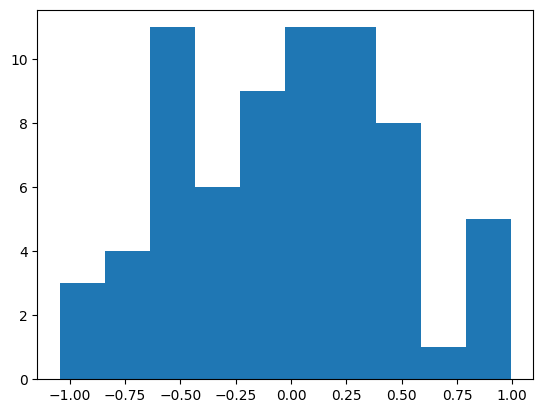

In [ ]:
import matplotlib.pyplot as plt

#### Estandarizamos el conjunto de testing usando el scalador del conjunto de training
df_test_scaled = pd.DataFrame(scaler.transform(df_test), columns = df_test.columns)

#### Extraemos las variables de entrada y le agregamos columna de unos para construir matriz de diseño
X_test = np.column_stack((np.ones(df_test_scaled.shape[0]), df_test_scaled.drop("body_mass_g", axis = 1).values))

### Calculamos nuestras predicciones y hat del conjunto de testing
y_hat_test = X_test @ betas

### Residuales del conjunto de testing
residuales = df_test_scaled.body_mass_g - y_hat_test

RMSE = np.sqrt(sum(residuales**2)/len(residuales))

print(f"RMSE: {RMSE}")
plt.hist(residuales)
plt.show()

In [ ]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(df_test_scaled.body_mass_g, y_hat_test)

0.4832402604077611

(array([ 3.,  4., 11.,  6.,  9., 11., 11.,  8.,  1.,  5.]),
 array([-1.04442848, -0.84065942, -0.63689035, -0.43312129, -0.22935223,
        -0.02558317,  0.17818589,  0.38195495,  0.58572401,  0.78949308,
         0.99326214]),
 <BarContainer object of 10 artists>)

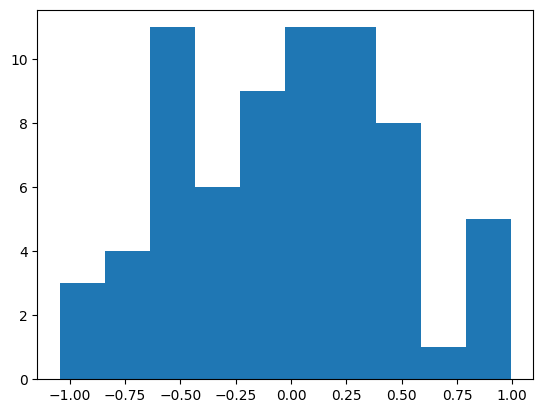

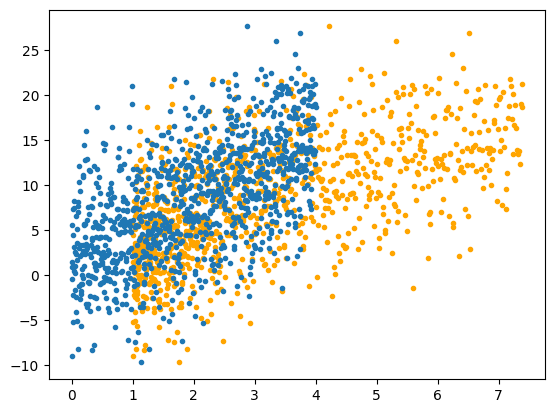

In [ ]:
x = np.linspace(0, 4, 1000)
x_prima = np.exp(x)

y = 2.3 + 3.1*np.log(x_prima) + np.random.normal(size = len(x), loc = 0, scale = 5)
y1 = 2.3 + 3.1*np.sqrt(x_prima) + np.random.normal(size = len(x), loc = 0, scale = 5)

plt.plot(np.sqrt(x_prima), y, '.', color = "orange")
plt.plot(np.log(x_prima), y, '.')

## Modelos de regresión Regularizados
- Ridge
- Lasso
- Elastic-Net

In [ ]:
df = pd.read_csv("meatspec.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


<Axes: >

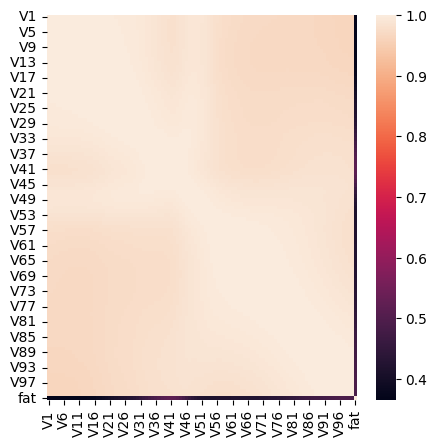

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))

sns.heatmap(df.corr(), ax = ax)

In [ ]:
y = df.fat.values
X = np.column_stack((np.ones(len(y)), df.drop("fat", axis = 1).values))

beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

array([ 7.30308581e+00,  1.08829995e+04, -1.21018658e+04, -6.08522054e+03,
        2.33654013e+04, -2.84807407e+04,  1.27827512e+04, -1.14453438e+04,
        7.13231850e+03,  7.81114594e+02,  3.51046853e+03, -1.05799000e+04,
        3.47364632e+04, -3.88229162e+04,  2.89624730e+04, -1.37550415e+04,
       -7.03898960e+03,  2.54186834e+03,  5.27565822e+03,  8.89328049e+03,
       -1.22161303e+04, -1.92506203e+04,  3.66694636e+04, -1.12242430e+04,
       -1.50011791e+04,  1.67196401e+04, -4.89835541e+03, -6.34641595e+03,
        2.40728125e+04, -4.00208101e+04,  3.34721704e+04, -2.33917638e+04,
        1.89615371e+04, -3.87290741e+03, -6.61627883e+03, -5.33685917e+03,
        1.04955678e+04, -8.40833280e+03, -4.14488227e+02,  1.98080503e+04,
       -2.36608009e+04,  2.93627661e+04, -3.20324330e+04,  1.18172492e+04,
       -9.98894877e+03,  2.30162825e+04, -9.05007417e+03, -4.83977221e+03,
        1.53939913e+03,  2.18283374e+03, -1.31633094e+04,  2.64095238e+04,
       -2.35576615e+04, -

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

### Modelo Rifge

modelo_ridge = RidgeCV(alphas = np.logspace(-10, 2, 200),
                       fit_intercept = True,
                       #normalize = True,
                       store_cv_values = True)

modelo_ridge.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


RidgeCV(alphas=array([1.00000000e-10, 1.14895100e-10, 1.32008840e-10, 1.51671689e-10,
       1.74263339e-10, 2.00220037e-10, 2.30043012e-10, 2.64308149e-10,
       3.03677112e-10, 3.48910121e-10, 4.00880633e-10, 4.60592204e-10,
       5.29197874e-10, 6.08022426e-10, 6.98587975e-10, 8.02643352e-10,
       9.22197882e-10, 1.05956018e-09, 1.21738273e-09, 1.39871310e-09,
       1.60705282e-09, 1.84642494e-0...
       4.10265811e+00, 4.71375313e+00, 5.41587138e+00, 6.22257084e+00,
       7.14942899e+00, 8.21434358e+00, 9.43787828e+00, 1.08436597e+01,
       1.24588336e+01, 1.43145894e+01, 1.64467618e+01, 1.88965234e+01,
       2.17111795e+01, 2.49450814e+01, 2.86606762e+01, 3.29297126e+01,
       3.78346262e+01, 4.34701316e+01, 4.99450512e+01, 5.73844165e+01,
       6.59318827e+01, 7.57525026e+01, 8.70359136e+01, 1.00000000e+02]),
        store_cv_values=True)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


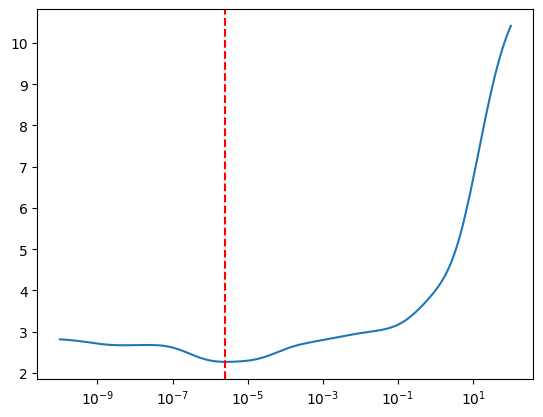

In [ ]:
RMSEs = np.sqrt(modelo_ridge.cv_values_.mean(axis = 0))

alpha_opt = alphas[np.argmin(RMSEs)]

plt.plot(alphas, RMSEs)
plt.xscale("log")
plt.axvline(alpha_opt, linestyle = "--", color = "red")
plt.show()

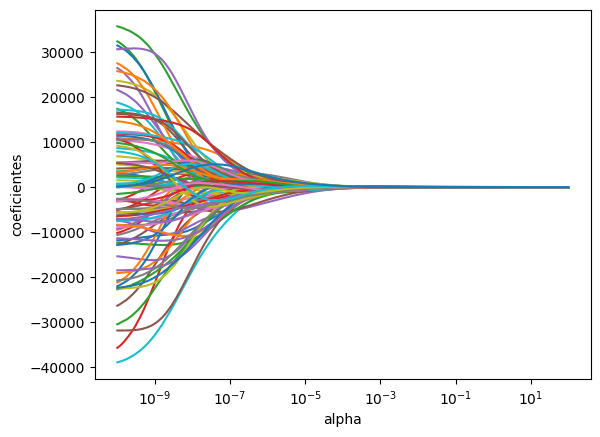

In [ ]:
alphas = modelo_ridge.alphas
coefs = []

for alpha in alphas:
  model_ = Ridge(alpha = alpha, fit_intercept = False)
  model_.fit(X, y)
  coefs.append(model_.coef_.flatten())

plt.plot(alphas, coefs)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coeficientes")
plt.show()

### Lasso

In [ ]:
import pandas as pd

df = pd.read_csv("meatspec.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


In [ ]:
y = df.fat.values
X = df.drop("fat", axis = 1).values

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet, LassoCV, ElasticNetCV
import pandas as pd
import numpy as np

modelo_lasso = LassoCV(alphas = np.logspace(-10, 2, 200),
                       fit_intercept = True,
                       #normalize = True,
                       cv = 10)

modelo_lasso.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7538550202880288, tolerance: 3.005411554404145
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.6480332854753215, tolerance: 3.005411554404145
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.171112917360006, tolerance: 3.005411554404145
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceW

LassoCV(alphas=array([1.00000000e-10, 1.14895100e-10, 1.32008840e-10, 1.51671689e-10,
       1.74263339e-10, 2.00220037e-10, 2.30043012e-10, 2.64308149e-10,
       3.03677112e-10, 3.48910121e-10, 4.00880633e-10, 4.60592204e-10,
       5.29197874e-10, 6.08022426e-10, 6.98587975e-10, 8.02643352e-10,
       9.22197882e-10, 1.05956018e-09, 1.21738273e-09, 1.39871310e-09,
       1.60705282e-09, 1.84642494e-0...
       4.10265811e+00, 4.71375313e+00, 5.41587138e+00, 6.22257084e+00,
       7.14942899e+00, 8.21434358e+00, 9.43787828e+00, 1.08436597e+01,
       1.24588336e+01, 1.43145894e+01, 1.64467618e+01, 1.88965234e+01,
       2.17111795e+01, 2.49450814e+01, 2.86606762e+01, 3.29297126e+01,
       3.78346262e+01, 4.34701316e+01, 4.99450512e+01, 5.73844165e+01,
       6.59318827e+01, 7.57525026e+01, 8.70359136e+01, 1.00000000e+02]),
        cv=10)

In [ ]:
import matplotlib.pyplot as plt

alphas = modelo_lasso.alphas
coefs = []
n_predictores = []

for alpha in alphas:
  model_ = Lasso(alpha = alpha, fit_intercept = True)
  model_.fit(X, y)
  coefs.append(model_.coef_.flatten())
  n_predictores.append(sum(model_.coef_.flatten() != 0))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.501e+03, tolerance: 3.474e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.501e+03, tolerance: 3.474e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.501e+03, tolerance: 3.474e

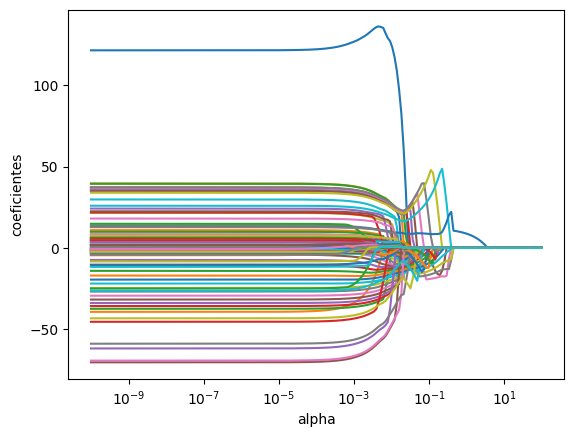

In [ ]:
plt.plot(alphas, coefs)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coeficientes")
plt.show()

Text(0.5, 1.0, 'Numero de predictores incluidos en la regularizacion')

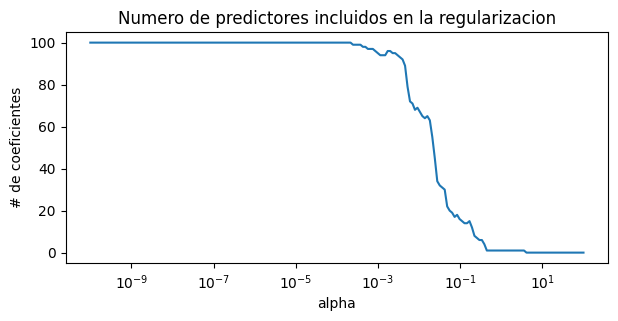

In [ ]:
#### Numero de variables de entrada incluidas en el modelo
#### Numero de coeficientes distintos de cero

plt.subplots(figsize=(7, 3))
plt.plot(alphas, n_predictores)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("# de coeficientes")
plt.title("Numero de predictores incluidos en la regularizacion")


In [ ]:
np.array(alphas)[np.array(n_predictores) == 12]

array([0.19338918])

In [ ]:
min_rms

2.9887229904310546

In [ ]:
np.max(rmse_cv[rmse_cv <= min_rms + sd_min_rmse])

5.08588363961085

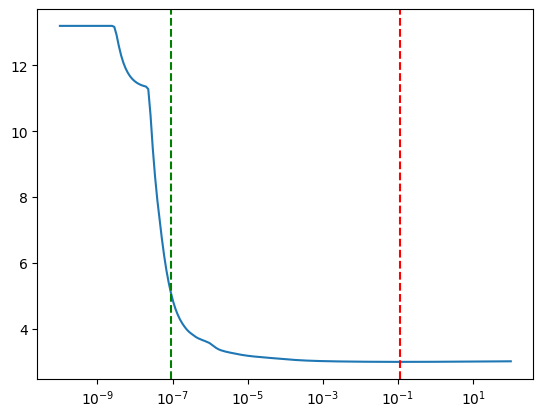

In [ ]:
### Asi se construiria la grafica de RMSE para los alphas de Lasso
mse_cv = modelo_lasso.mse_path_.mean(axis = 1)
mse_sd = modelo_lasso.mse_path_.std(axis = 1)

### aplicamos raiza cuadra a las medias de los mse's y a las desviaciones estandar de los mse's
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

### identificando lo que seria el alpha optimo y el alpho_opt + 1sigma
min_rms = np.min(rmse_cv)
sd_min_rmse = rmse_sd[np.argmin(rmse_cv)]
alpha_opt = alphas[np.argmin(rmse_cv)]

###
min_rmse_1sd = np.max(rmse_cv[rmse_cv <= min_rms + sd_min_rmse])
alpha_opt_1sd = alphas[rmse_cv == min_rmse_1sd] ### OJO: Este se puede usar en dado caso que el alpha optimo
### les de el mas pequño o el más grande en la malla de busqueda

plt.plot(alphas, RMSEs)
plt.xscale("log")
plt.axvline(alpha_opt, linestyle = "--", color = "red")
plt.axvline(alpha_opt_1sd, linestyle = "--", color = "green")
plt.show()

In [ ]:
model_final_lasso = Lasso(alpha = alpha_opt, fit_intercept = True)
model_final_lasso.fit(X, y)
model_final_lasso.coef_.flatten()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.640e+02, tolerance: 3.474e+00
  model = cd_fast.enet_coordinate_descent(


array([ -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -8.46379215, -19.01748518, -16.2679198 ,
       -13.72472149, -10.91177884,  -8.46643843,  -5.84201099,
        -2.90097394,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   7.10279267,  47.84293815,  32.08067835,
         8.49940556,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -5.27111011,
        -9.4264648 ,  -2.962441  ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.  

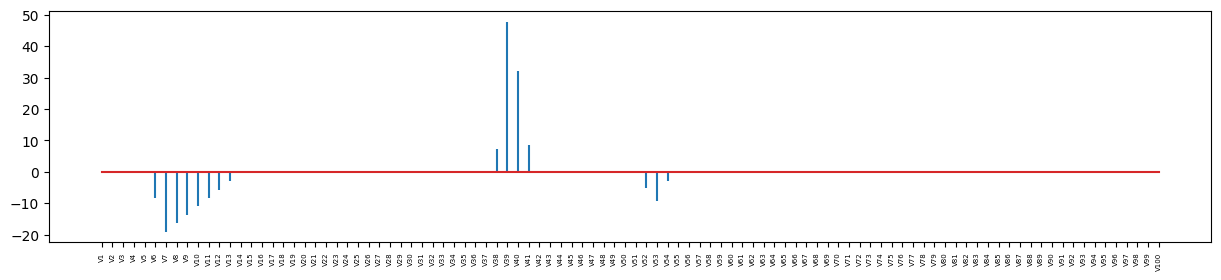

In [ ]:
df_betas = pd.DataFrame({
    "variables_entrada": df.columns[:-1],
    "betas": model_final_lasso.coef_.flatten()
})

fig, ax = plt.subplots(figsize = (15, 3))

ax.stem(df_betas.variables_entrada, df_betas.betas, markerfmt = ' ')
plt.xticks(rotation = 90, size = 5)
plt.show()

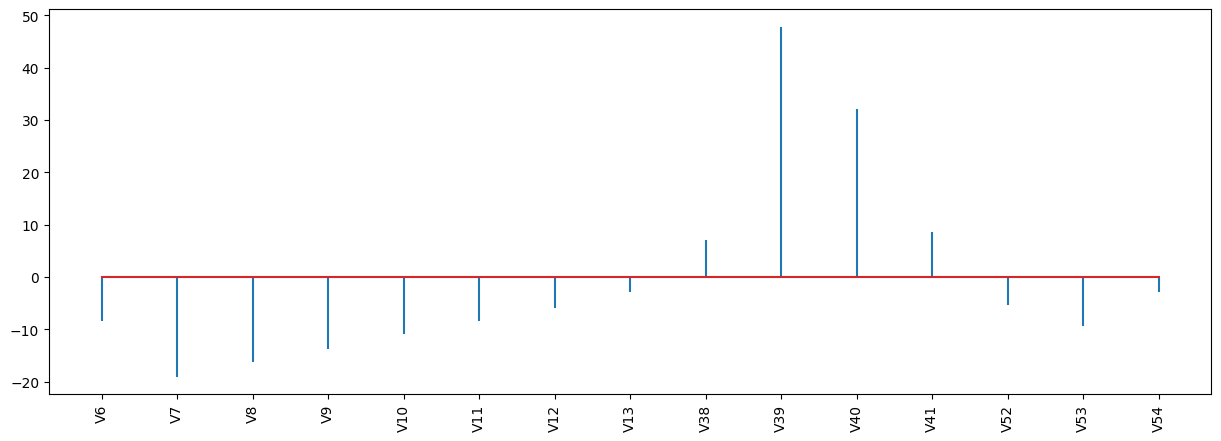

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))

df_betas = df_betas.query("betas != 0")

ax.stem(df_betas.variables_entrada, df_betas.betas, markerfmt = ' ')
plt.xticks(rotation = 90)
#plt.grid()
plt.show()


## Regresion Elastic-Net

In [ ]:
l1_ratios = [0.982, 0.984, 0.985, 0.986, 0.987]
modelo_elasticnet = ElasticNetCV(
    l1_ratio = l1_ratios,
    alphas = np.logspace(-10, 2, 200),
    fit_intercept = True,
    cv = 10)

modelo_elasticnet.fit(X, y)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90.9900627190384, tolerance: 3.427447502590674
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.24650567049434, tolerance: 3.427447502590674
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.42351685022413, tolerance: 3.427447502590674
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packag

ElasticNetCV(alphas=array([1.00000000e-10, 1.14895100e-10, 1.32008840e-10, 1.51671689e-10,
       1.74263339e-10, 2.00220037e-10, 2.30043012e-10, 2.64308149e-10,
       3.03677112e-10, 3.48910121e-10, 4.00880633e-10, 4.60592204e-10,
       5.29197874e-10, 6.08022426e-10, 6.98587975e-10, 8.02643352e-10,
       9.22197882e-10, 1.05956018e-09, 1.21738273e-09, 1.39871310e-09,
       1.60705282e-09, 1.846424...
       4.10265811e+00, 4.71375313e+00, 5.41587138e+00, 6.22257084e+00,
       7.14942899e+00, 8.21434358e+00, 9.43787828e+00, 1.08436597e+01,
       1.24588336e+01, 1.43145894e+01, 1.64467618e+01, 1.88965234e+01,
       2.17111795e+01, 2.49450814e+01, 2.86606762e+01, 3.29297126e+01,
       3.78346262e+01, 4.34701316e+01, 4.99450512e+01, 5.73844165e+01,
       6.59318827e+01, 7.57525026e+01, 8.70359136e+01, 1.00000000e+02]),
             cv=10, l1_ratio=[0.982, 0.984, 0.985, 0.986, 0.987])

Text(0, 0.5, 'MSE')

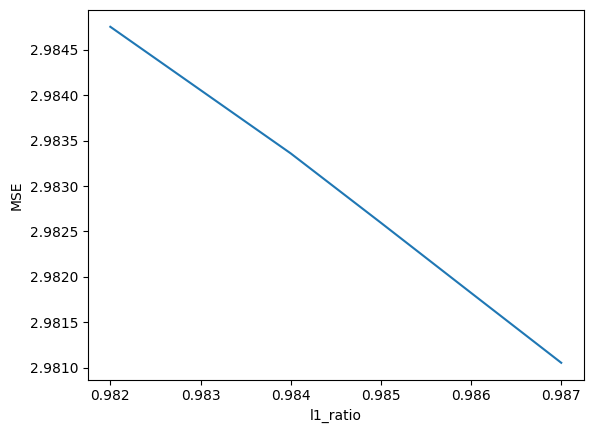

In [ ]:
mean_errors = np.sqrt(modelo_elasticnet.mse_path_.mean(axis = 2))

plt.plot(l1_ratios, mean_errors.min(axis = 1))
plt.xlabel("l1_ratio")
plt.ylabel("MSE")

In [ ]:
df_rmse_en = pd.DataFrame(mean_errors, columns = np.logspace(-10, 2, 200), index = l1_ratios)

l1_ratio_opt = l1_ratios[np.argmin(mean_errors.min(axis = 1))]
alpha_opt = df_rmse_en.loc[l1_ratio_opt].idxmin()

print(f"l1 ratio óptimo: {l1_ratio_opt}")
print(f"alpha óptimo: {alpha_opt}")

l1 ratio óptimo: 0.987
alpha óptimo: 0.14649713983072818


In [ ]:
modelo_elasticnet_final = ElasticNet(
    l1_ratio = l1_ratio_opt,
    alpha = alpha_opt,
    fit_intercept = True)

modelo_elasticnet_final.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.738e+02, tolerance: 3.474e+00
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.14649713983072818, l1_ratio=0.987)

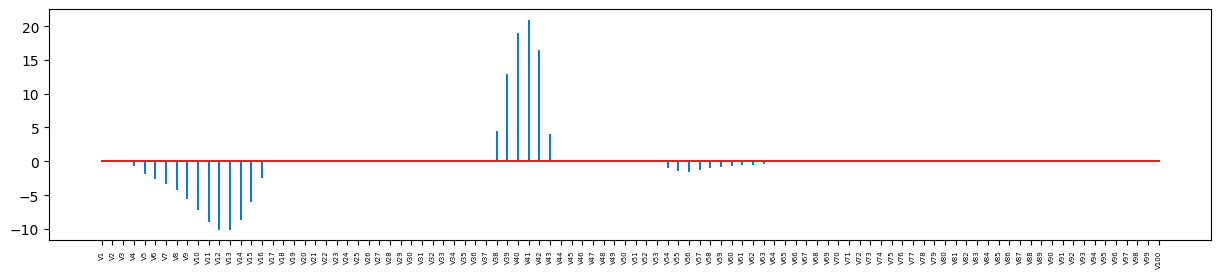

In [ ]:
df_betas = pd.DataFrame({
    "variables_entrada": df.columns[:-1],
    "betas": modelo_elasticnet_final.coef_.flatten()
})

fig, ax = plt.subplots(figsize = (15, 3))

ax.stem(df_betas.variables_entrada, df_betas.betas, markerfmt = ' ')
plt.xticks(rotation = 90, size = 5)
plt.show()